In [1]:
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/Drive")

Mounted at /content/Drive


In [3]:
data = ("/content/Drive/MyDrive/ML 2 Project/EasyVisa.csv")

In [4]:
data = pd.read_csv(data)

In [5]:
da= data.copy()

In [6]:
da.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
da.shape

(25480, 12)

In [8]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
da.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [10]:
cat_col = da.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(da[column].value_counts(normalize=True))
    print("-" * 50)

case_id
EZYV01       0.000039
EZYV16995    0.000039
EZYV16993    0.000039
EZYV16992    0.000039
EZYV16991    0.000039
               ...   
EZYV8492     0.000039
EZYV8491     0.000039
EZYV8490     0.000039
EZYV8489     0.000039
EZYV25480    0.000039
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, 

In [11]:
da["case_id"].value_counts()

,count
case_id,
EZYV01,1
EZYV16995,1
EZYV16993,1
EZYV16992,1
EZYV16991,1
...,...
EZYV8492,1
EZYV8491,1
EZYV8490,1


In [12]:
da.drop(["case_id"], axis=1, inplace=True)

In [13]:
da.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [14]:
da.duplicated().sum()

0

In [15]:
da.describe(include="all")

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [16]:
#EDA

In [17]:
#Univariate analysis

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.suptitle(f"Distribution of {feature} in Boxplot and Histogram", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [19]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Set the title to the feature (column name)
    plt.title(f"Distribution of {feature}", fontsize=16)  # Add the title here

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

In [20]:
cat_column = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
    "case_status"
]

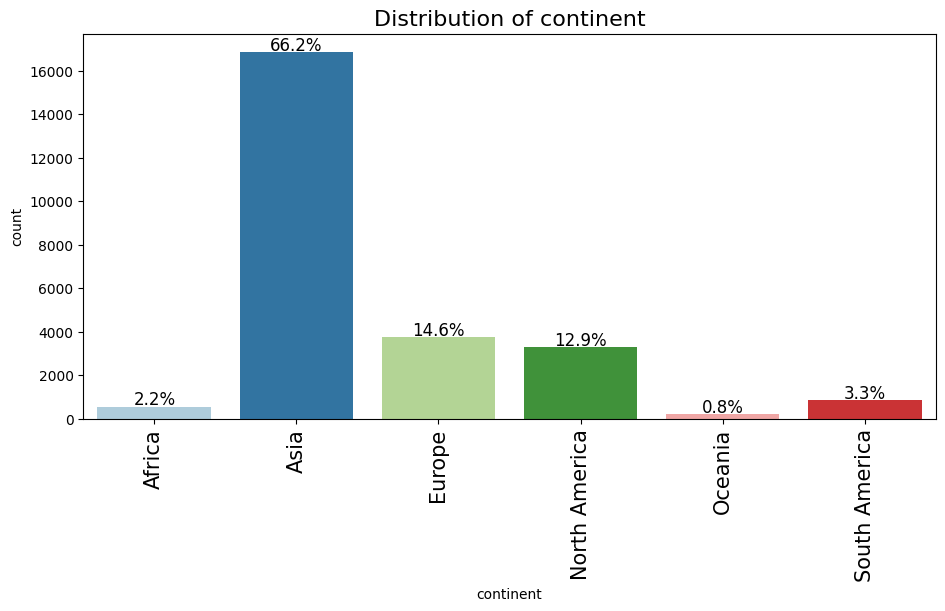

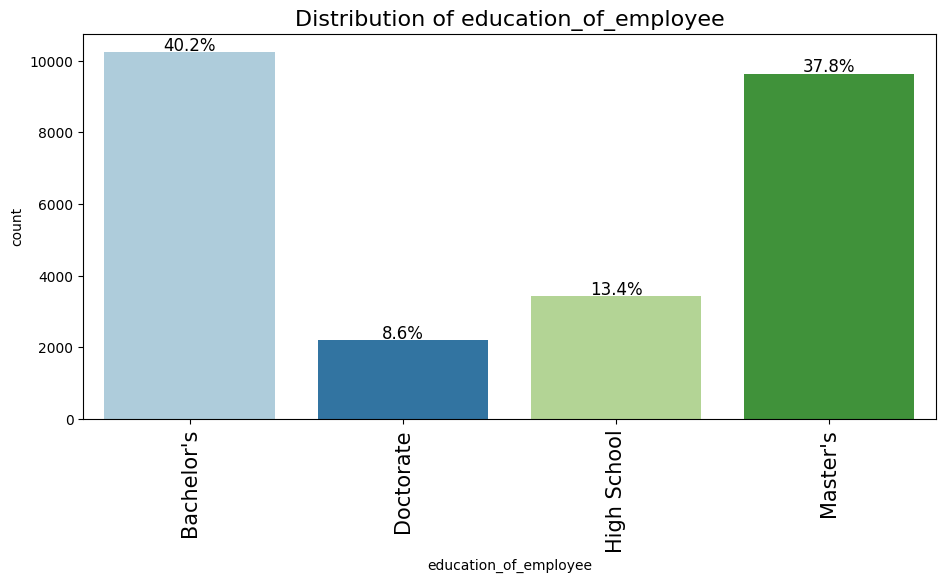

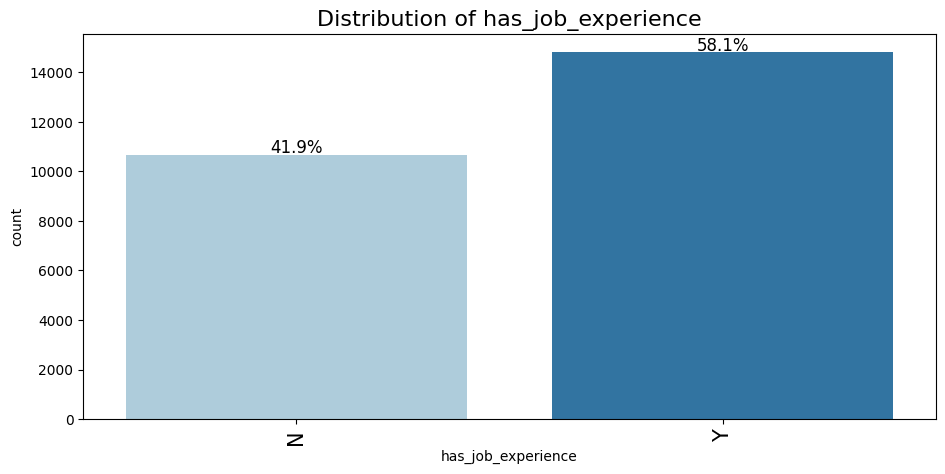

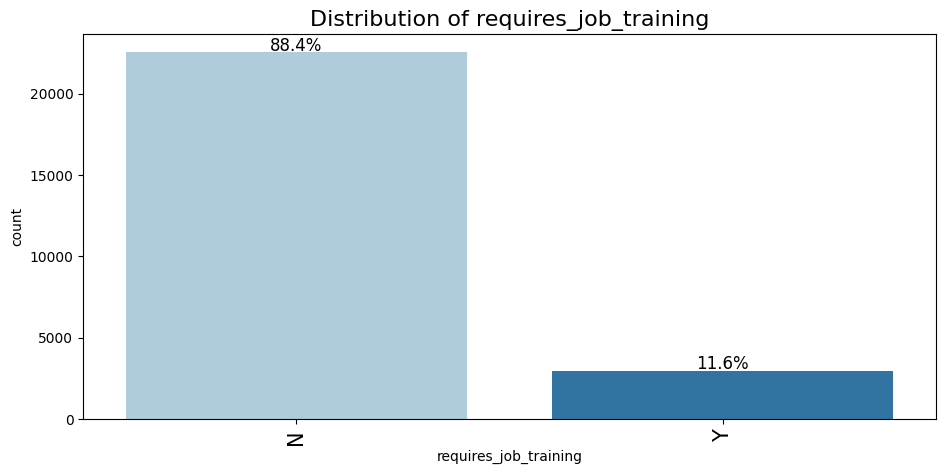

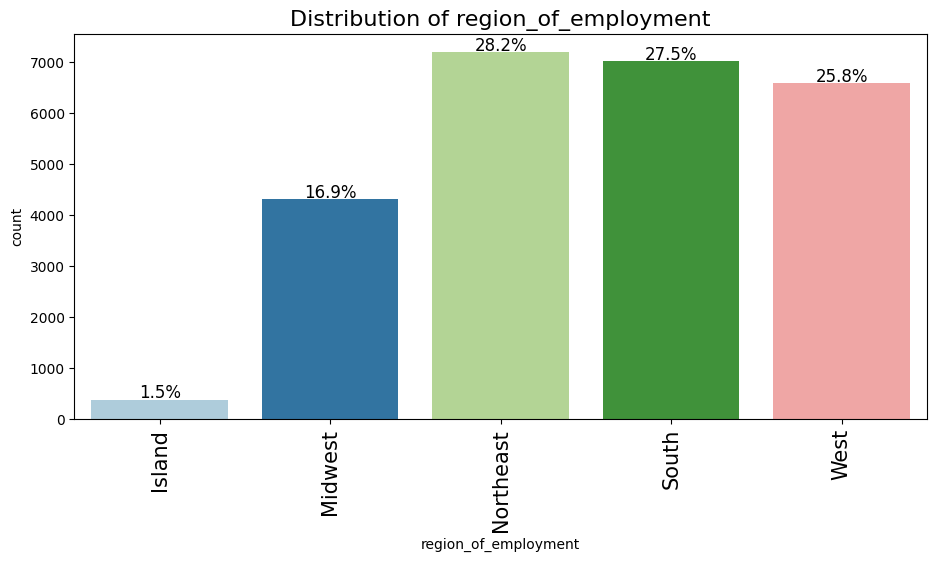

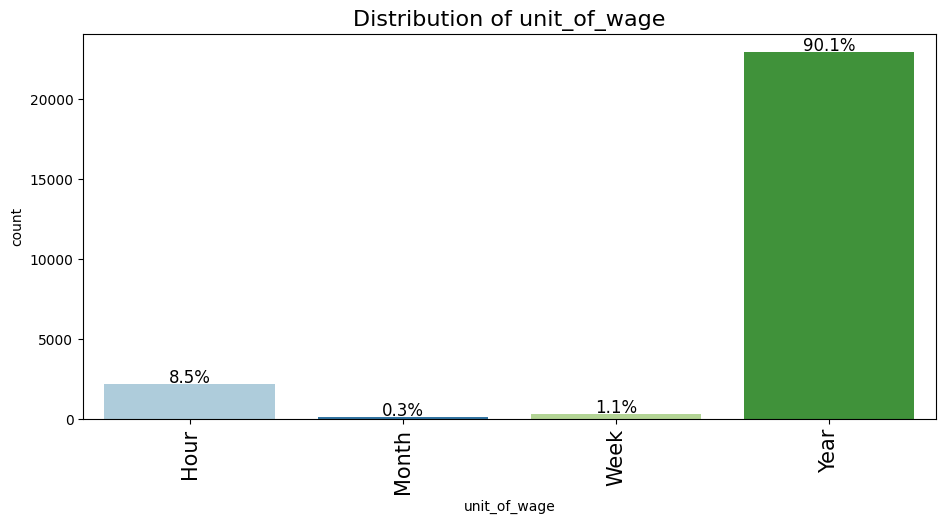

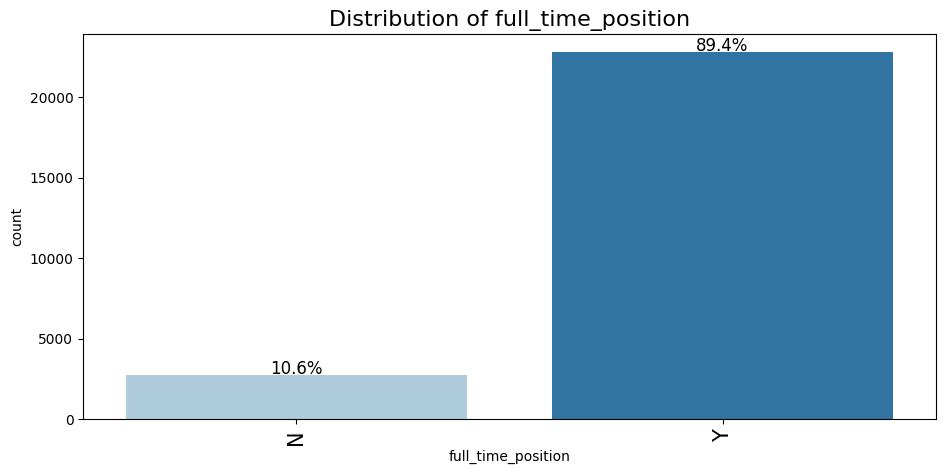

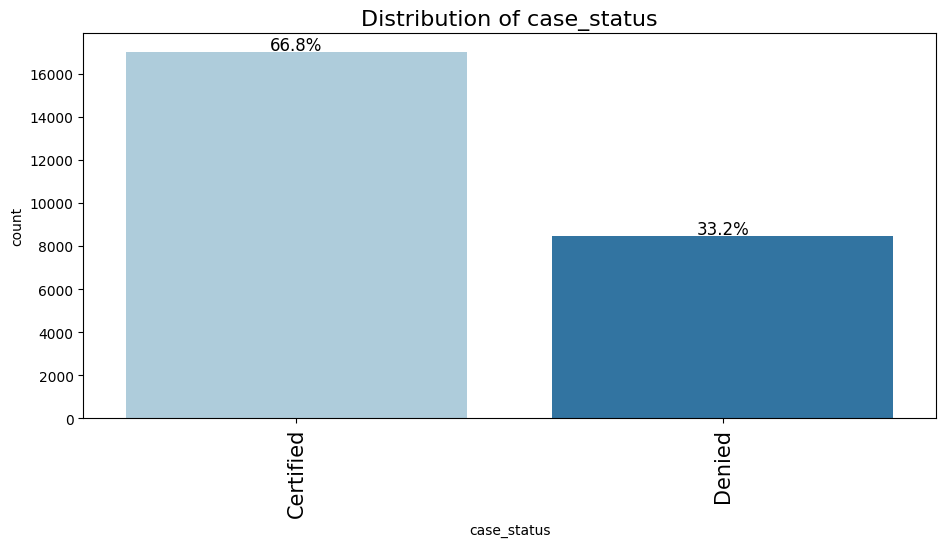

In [21]:
for feature in cat_column:
    labeled_barplot(da, feature, perc=True, n=10)

In [22]:
num_column = ["no_of_employees", "yr_of_estab", "prevailing_wage"]

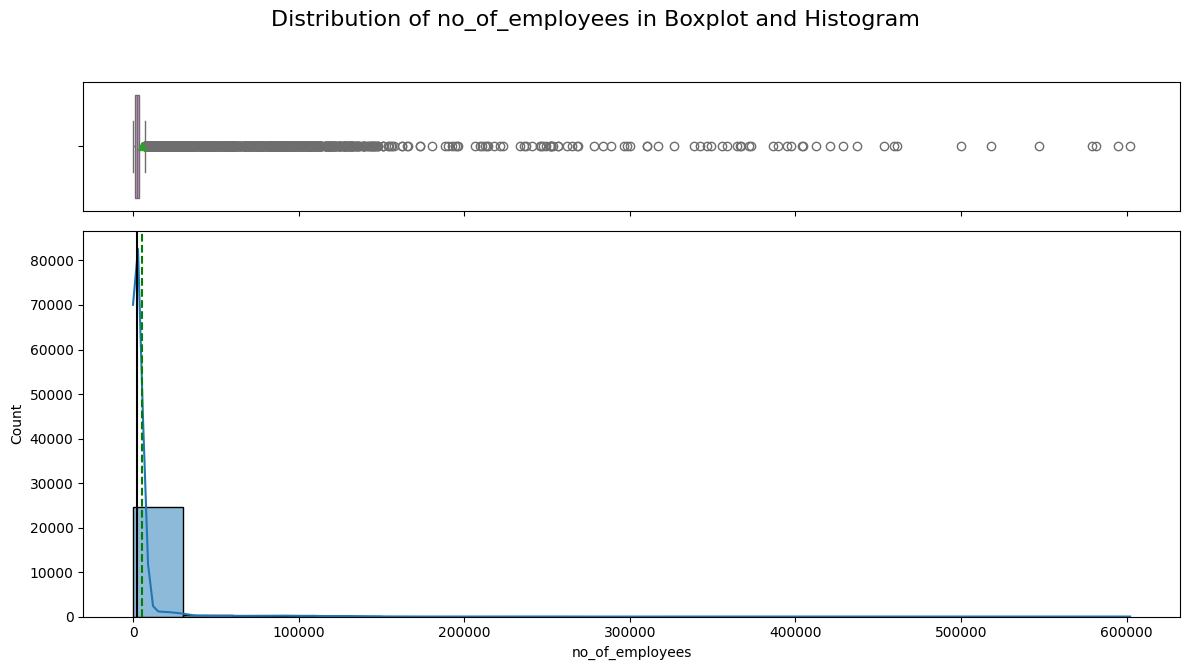

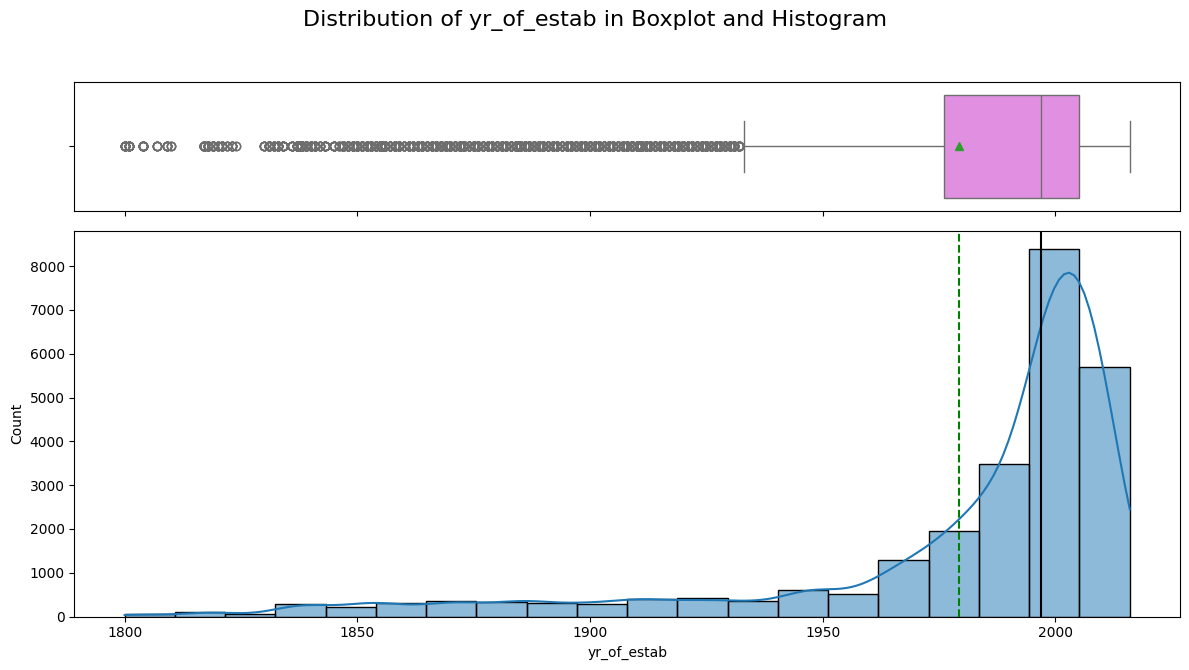

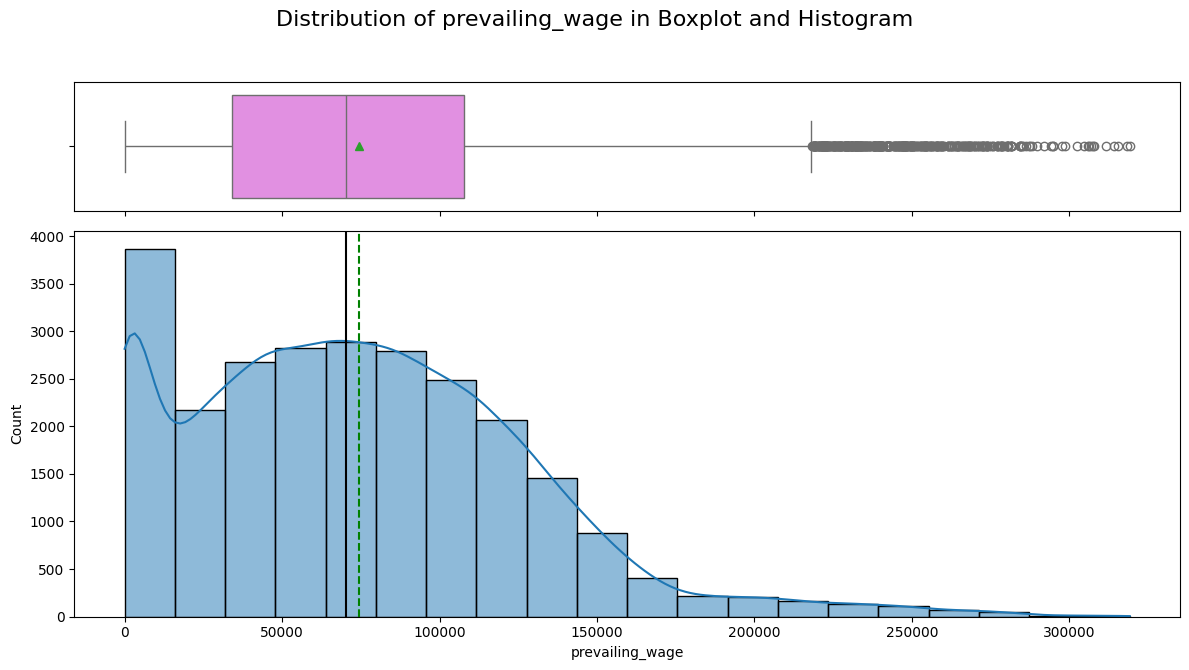

In [23]:
for feature in num_column:
    histogram_boxplot(da, feature, figsize=(12, 7), kde=True, bins=20)

In [24]:
#Bivariate analysis

In [25]:
df = pd.DataFrame(da)

In [26]:
df_selected = df[['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'case_status']]
df_selected['case_status'] = df_selected['case_status'].map({'Denied': 0, 'Certified': 1})

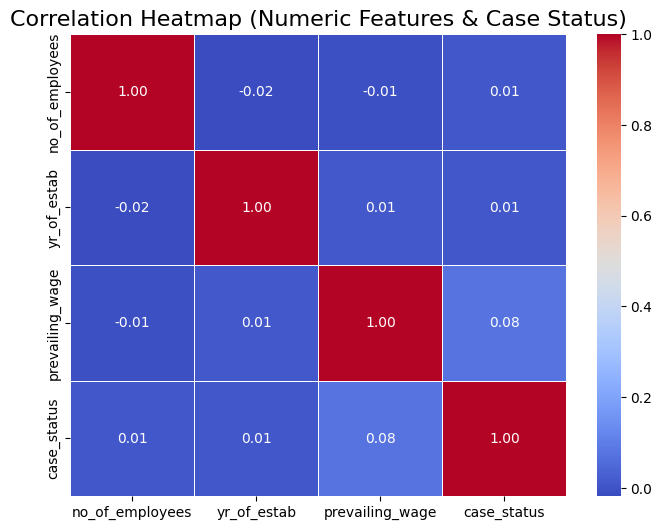

In [27]:
corr_matrix = df_selected.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features & Case Status)", fontsize=16)
plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


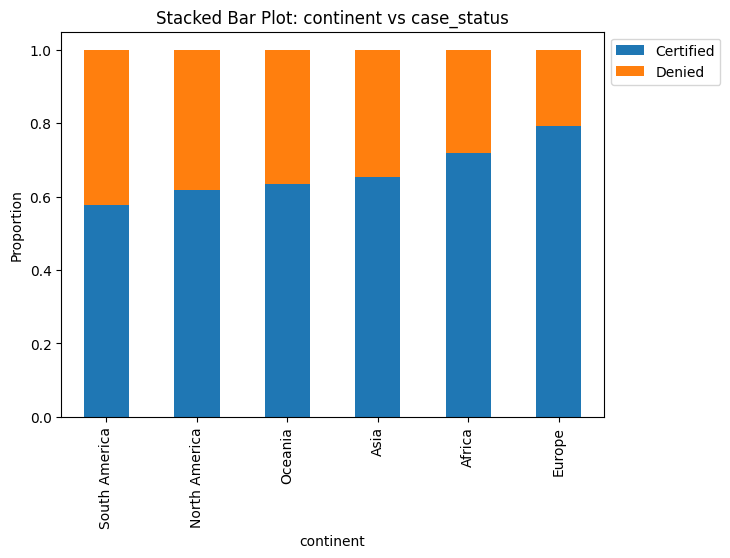

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


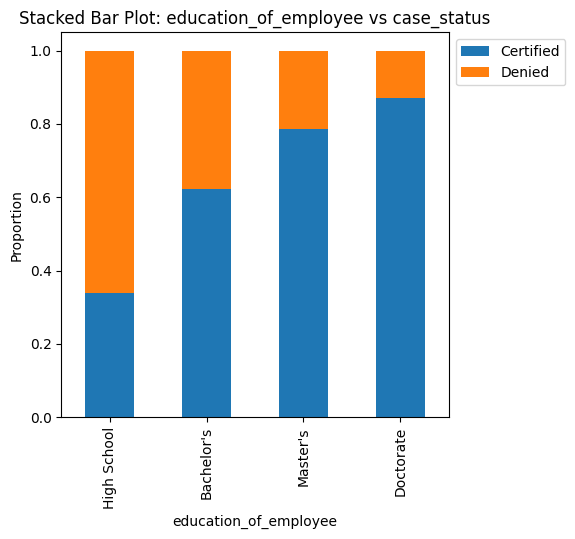

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


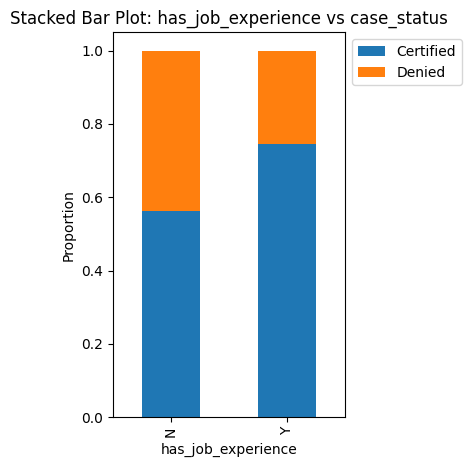

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


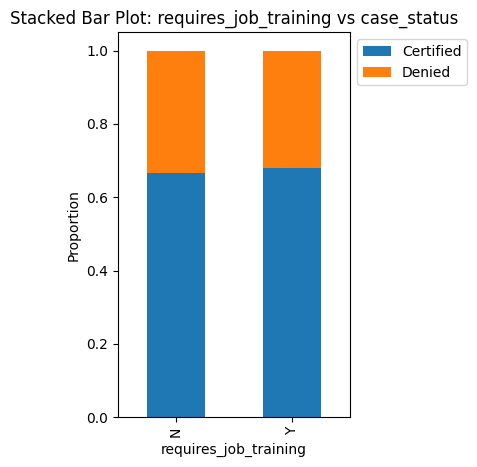

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


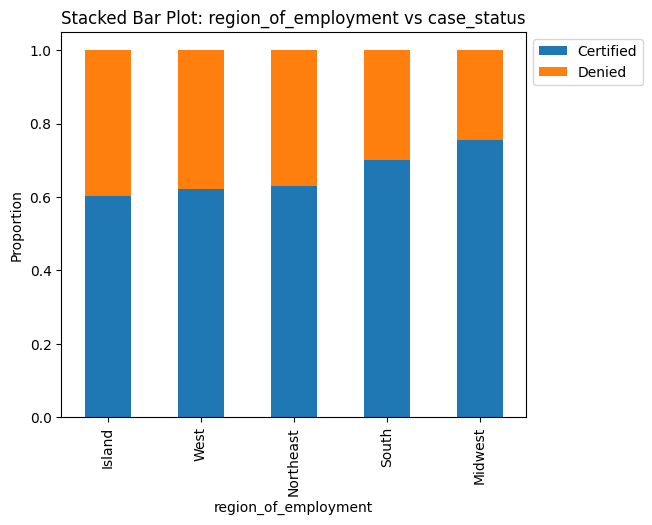

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


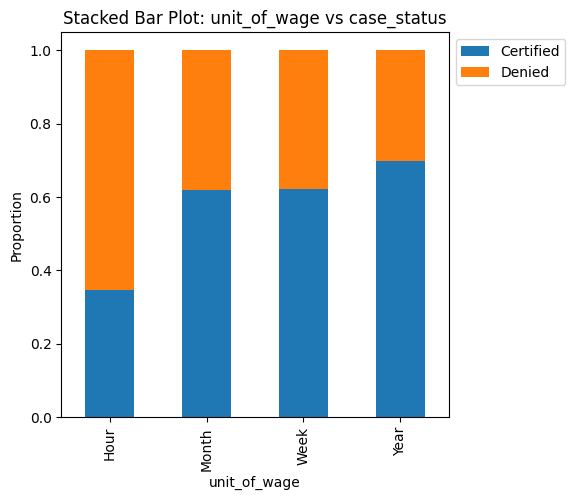

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


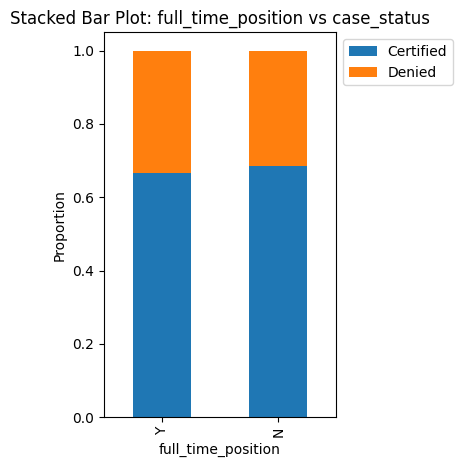

In [28]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart.

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    # Get the number of unique values in the predictor
    count = data[predictor].nunique()

    # Get the last value count of the target for sorting
    sorter = data[target].value_counts().index[-1]

    # Create a crosstab for category counts and print it
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    # Normalize the crosstab and sort it
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot the stacked bar chart
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))

    # Set legend position and styling
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f"Stacked Bar Plot: {predictor} vs {target}")
    plt.xlabel(predictor)
    plt.ylabel("Proportion")
    plt.show()

# List of categorical columns (excluding the target column)
cat_column = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
    "case_status"
]

# Assuming df is your dataframe
target = "case_status"

# Iterate through the categorical columns (excluding the target)
for predictor in cat_column[:-1]:  # Exclude 'case_status' from the loop
    stacked_barplot(da, predictor, target)

In [29]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()
    print("-"*155)

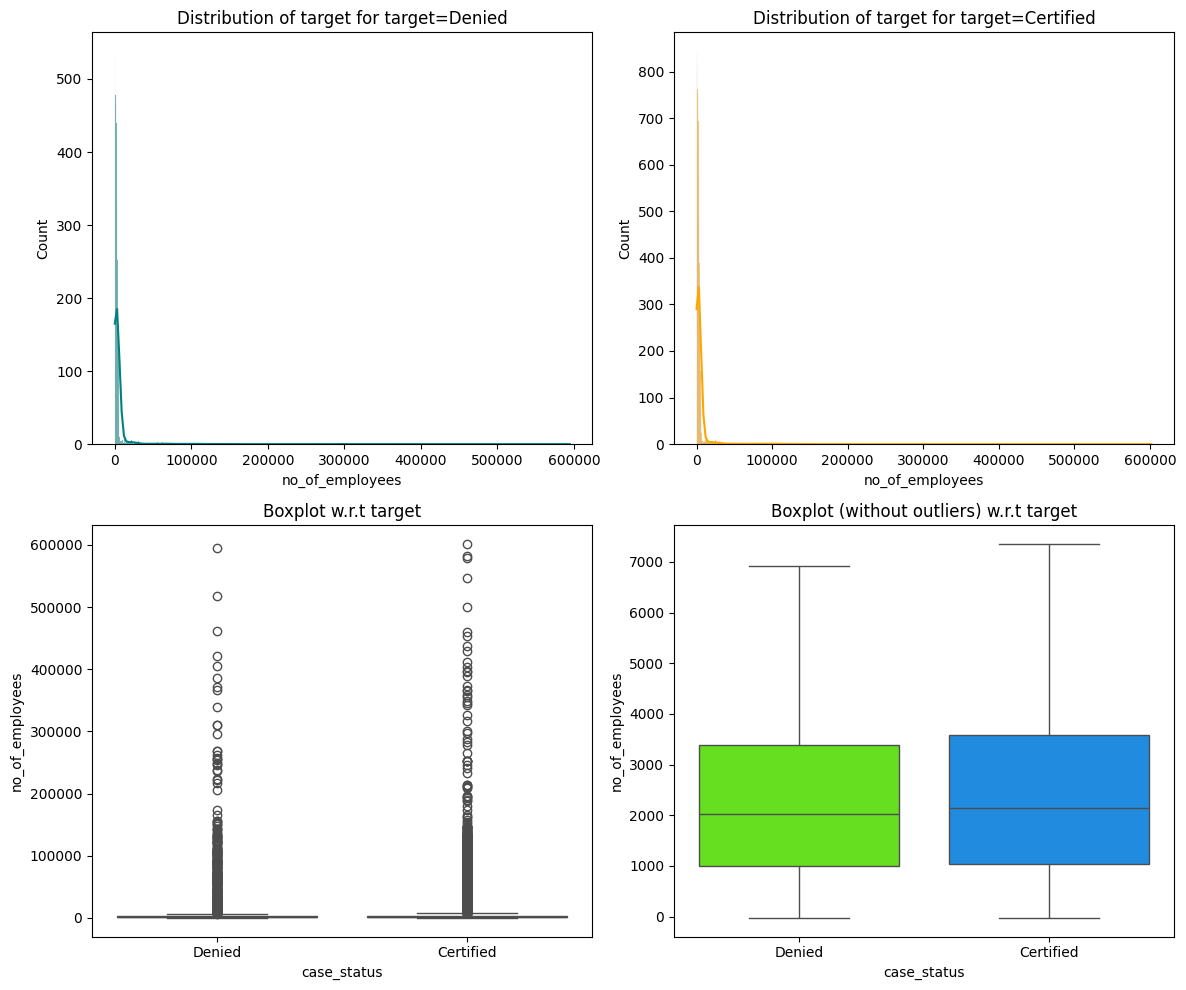

-----------------------------------------------------------------------------------------------------------------------------------------------------------


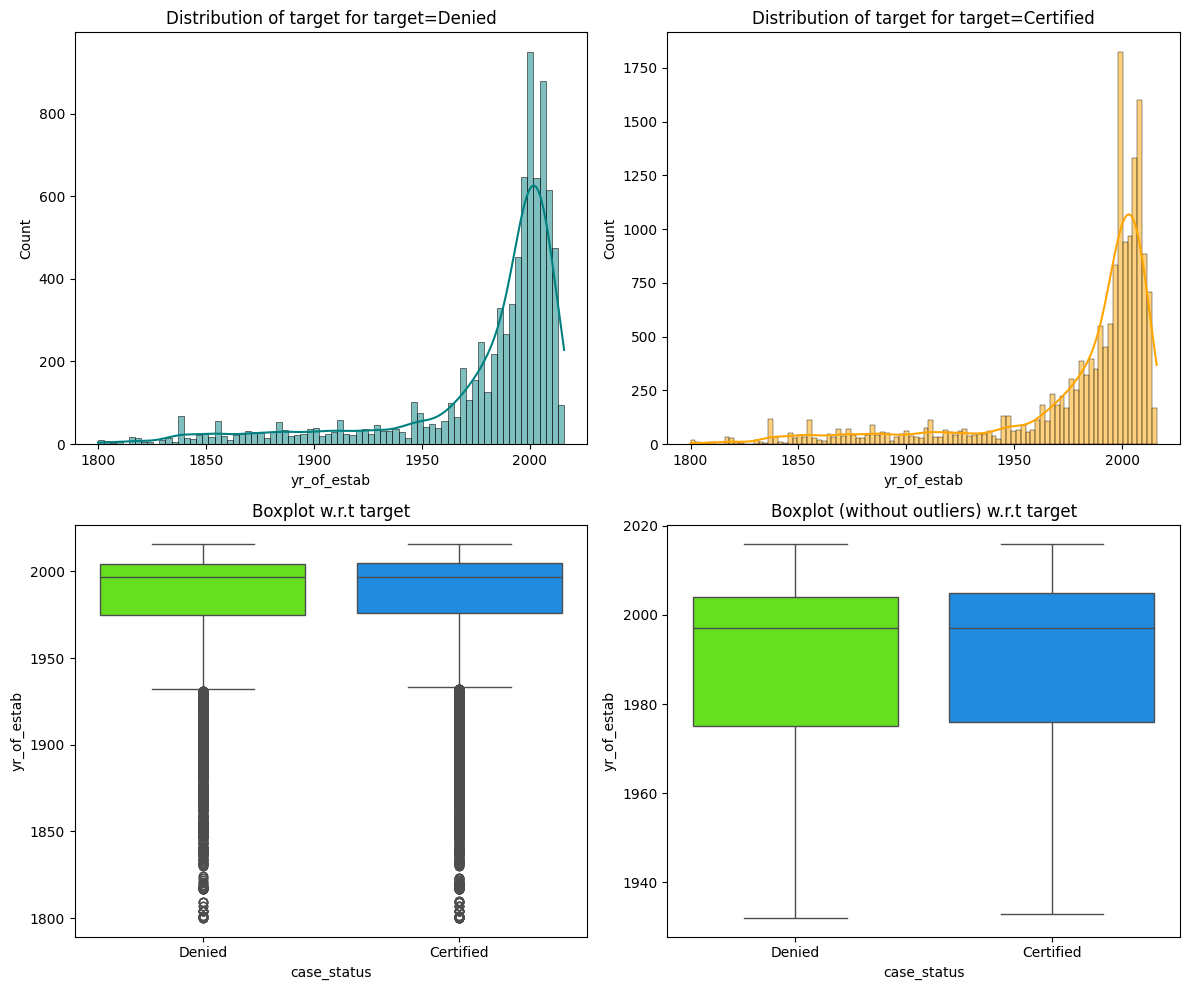

-----------------------------------------------------------------------------------------------------------------------------------------------------------


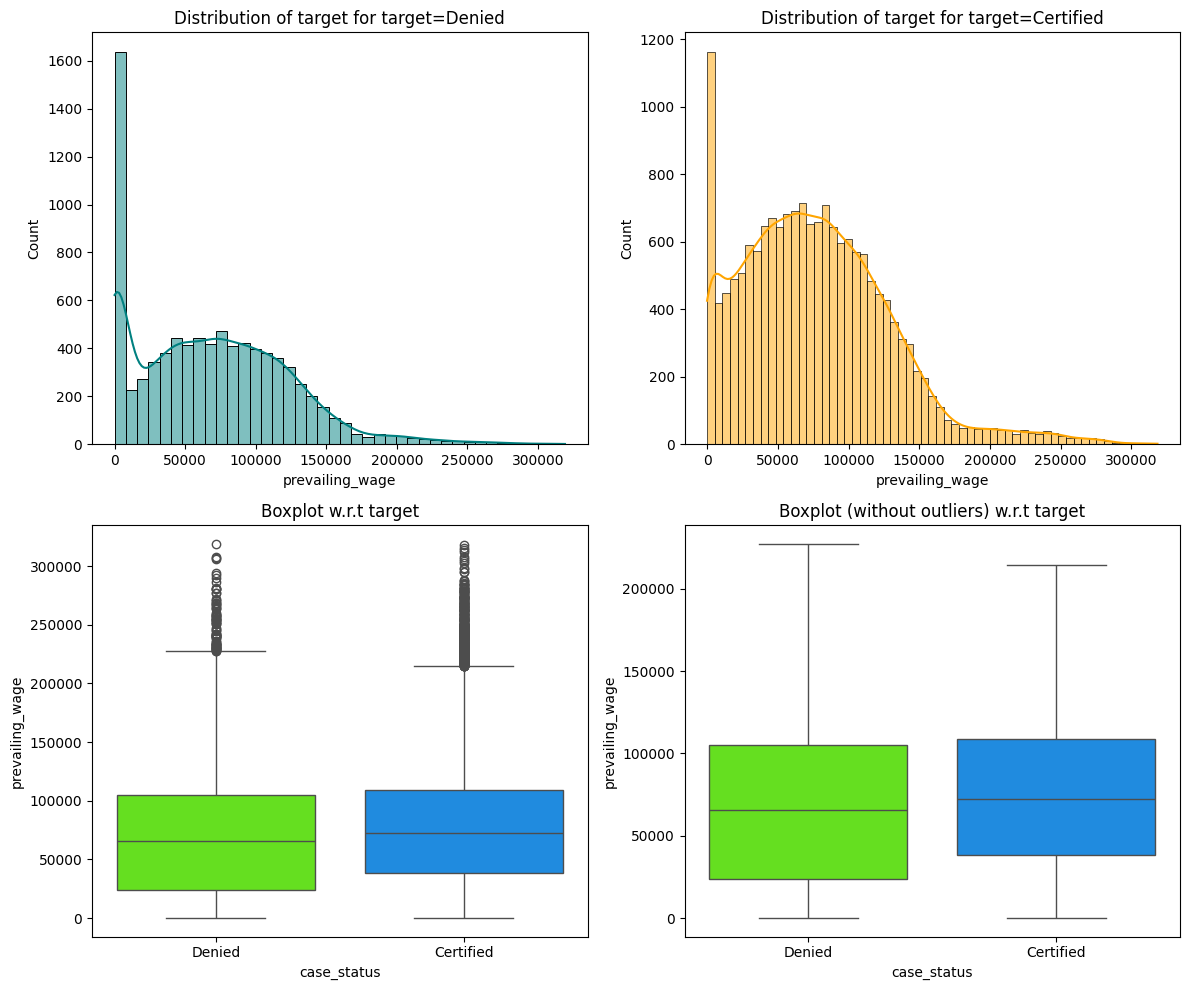

-----------------------------------------------------------------------------------------------------------------------------------------------------------


In [30]:
for predictor in num_column:  # Exclude 'case_status' from the loop
    distribution_plot_wrt_target(da, predictor, target)

In [31]:
print(num_column)

['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [32]:
da.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [33]:
median_employees = da['no_of_employees'].median()
da['no_of_employees'] = da['no_of_employees'].apply(lambda x: median_employees if x < 0 else x)

In [34]:
da.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5669.797645,22877.372247,12.0000,1028.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [35]:
da.duplicated().sum()

0

In [36]:
#Feature Engineering

In [37]:
import datetime

# Step 1: Create 'company_age' by subtracting 'yr_of_estab' from the current year
current_year = datetime.datetime.now().year
da['company_age'] = current_year - da['yr_of_estab']

# Step 2: Drop 'yr_of_estab' as it is now redundant
da = da.drop(columns=['yr_of_estab'])

# Check the final dataset
print(da.head())

  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees region_of_employment  prevailing_wage unit_of_wage  \
0          14513.0                 West         592.2029         Hour   
1           2412.0            Northeast       83425.6500         Year   
2          44444.0                 West      122996.8600         Year   
3             98.0                 West       83434.0300         Year   
4           1082.0                South      149907.3900         Year   

  full_time_position case_status  company_age  
0                  Y      Denied           1

In [38]:
object_cols = da.select_dtypes(include=['object']).columns
print(object_cols)

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


In [39]:
categorical_cols = ['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status']
for col in categorical_cols:
    da[col] = da[col].astype('category')

In [40]:
print(da.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  float64 
 5   region_of_employment   25480 non-null  category
 6   prevailing_wage        25480 non-null  float64 
 7   unit_of_wage           25480 non-null  category
 8   full_time_position     25480 non-null  category
 9   case_status            25480 non-null  category
 10  company_age            25480 non-null  int64   
dtypes: category(8), float64(2), int64(1)
memory usage: 797.7 KB
None


In [41]:
da.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513.0,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412.0,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444.0,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98.0,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082.0,South,149907.3900,Year,Y,Certified,19


In [42]:
da.describe(include="all")

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
count,25480,25480,25480,25480,25480.000000,25480,25480.000000,25480,25480,25480,25480.000000
unique,6,4,2,2,NaN,5,NaN,4,2,2,NaN
top,Asia,Bachelor's,Y,N,NaN,Northeast,NaN,Year,Y,Certified,NaN
freq,16861,10234,14802,22525,NaN,7195,NaN,22962,22773,17018,NaN
mean,NaN,NaN,NaN,NaN,5669.797645,NaN,74455.814592,NaN,NaN,NaN,44.590071
std,NaN,NaN,NaN,NaN,22877.372247,NaN,52815.942327,NaN,NaN,NaN,42.366929
min,NaN,NaN,NaN,NaN,12.000000,NaN,2.136700,NaN,NaN,NaN,8.000000
25%,NaN,NaN,NaN,NaN,1028.000000,NaN,34015.480000,NaN,NaN,NaN,19.000000
50%,NaN,NaN,NaN,NaN,2109.000000,NaN,70308.210000,NaN,NaN,NaN,27.000000
75%,NaN,NaN,NaN,NaN,3504.000000,NaN,107735.512500,NaN,NaN,NaN,48.000000


In [43]:
education_mapping = {
    "Bachelor's": 2,
    "Master's": 3,
    "High School": 1,
    "Doctorate": 4
}

has_job_experience_mapping = {
    'Y': 1,
    'N': 0
}

requires_job_training_mapping = {
    'N': 0,
    'Y': 1
}

unit_of_wage_mapping = {
    'Year': 4,
    'Hour': 1,
    'Week': 2,
    'Month': 3
}

full_time_position_mapping = {
    'Y': 1,
    'N': 0
}

# Apply the mapping to the respective columns
da['education_of_employee'] = da['education_of_employee'].map(education_mapping)
da['has_job_experience'] = da['has_job_experience'].map(has_job_experience_mapping)
da['requires_job_training'] = da['requires_job_training'].map(requires_job_training_mapping)
da['unit_of_wage'] = da['unit_of_wage'].map(unit_of_wage_mapping)
da['full_time_position'] = da['full_time_position'].map(full_time_position_mapping)


In [44]:
da.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,1,0,0,14513.0,West,592.2029,1,1,Denied,17
1,Asia,3,1,0,2412.0,Northeast,83425.6500,4,1,Certified,22
2,Asia,2,0,1,44444.0,West,122996.8600,4,1,Denied,16
3,Asia,2,0,0,98.0,West,83434.0300,4,1,Denied,127
4,Africa,3,1,0,1082.0,South,149907.3900,4,1,Certified,19


In [45]:
da = pd.get_dummies(da, columns=['continent', 'region_of_employment'], drop_first=True)

In [46]:
da.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,1,0,0,14513.0,592.2029,1,1,Denied,17,True,False,False,False,False,False,False,False,True
1,3,1,0,2412.0,83425.6500,4,1,Certified,22,True,False,False,False,False,False,True,False,False
2,2,0,1,44444.0,122996.8600,4,1,Denied,16,True,False,False,False,False,False,False,False,True
3,2,0,0,98.0,83434.0300,4,1,Denied,127,True,False,False,False,False,False,False,False,True
4,3,1,0,1082.0,149907.3900,4,1,Certified,19,False,False,False,False,False,False,False,True,False


In [47]:
da = da.applymap(lambda x: float(x) if isinstance(x, bool) else x)


In [48]:
da.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,1,0,0,14513.0,592.2029,1,1,Denied,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,1,0,2412.0,83425.6500,4,1,Certified,22,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0,1,44444.0,122996.8600,4,1,Denied,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,98.0,83434.0300,4,1,Denied,127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,1,0,1082.0,149907.3900,4,1,Certified,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   education_of_employee           25480 non-null  category
 1   has_job_experience              25480 non-null  category
 2   requires_job_training           25480 non-null  category
 3   no_of_employees                 25480 non-null  float64 
 4   prevailing_wage                 25480 non-null  float64 
 5   unit_of_wage                    25480 non-null  category
 6   full_time_position              25480 non-null  category
 7   case_status                     25480 non-null  category
 8   company_age                     25480 non-null  int64   
 9   continent_Asia                  25480 non-null  float64 
 10  continent_Europe                25480 non-null  float64 
 11  continent_North America         25480 non-null  float64 
 12  continent_Oceania 

In [50]:
da.isnull().sum()

,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0
case_status,0
company_age,0
continent_Asia,0


In [51]:
da.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5669.797645,22877.372247,12.0000,1028.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
company_age,25480.0,44.590071,42.366929,8.0000,19.00,27.00,48.0000,224.00
continent_Asia,25480.0,0.661735,0.473129,0.0000,0.00,1.00,1.0000,1.00
continent_Europe,25480.0,0.146468,0.353582,0.0000,0.00,0.00,0.0000,1.00
continent_North America,25480.0,0.129199,0.335427,0.0000,0.00,0.00,0.0000,1.00
continent_Oceania,25480.0,0.007535,0.086480,0.0000,0.00,0.00,0.0000,1.00
continent_South America,25480.0,0.033438,0.179781,0.0000,0.00,0.00,0.0000,1.00
region_of_employment_Midwest,25480.0,0.169035,0.374790,0.0000,0.00,0.00,0.0000,1.00
region_of_employment_Northeast,25480.0,0.282378,0.450165,0.0000,0.00,0.00,1.0000,1.00


In [52]:
da.shape

(25480, 18)

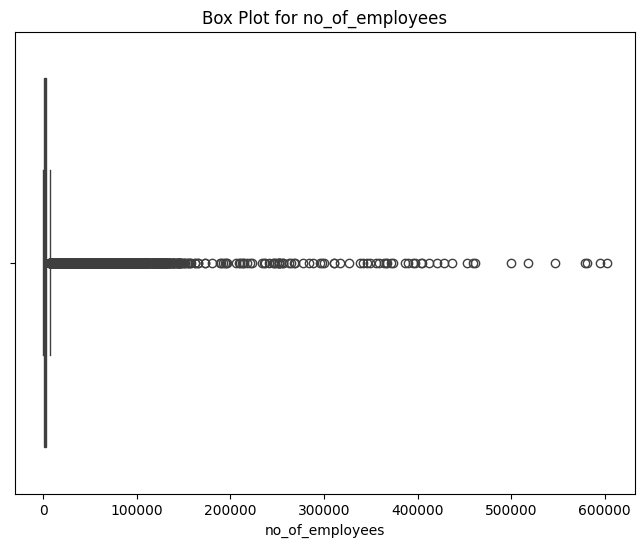

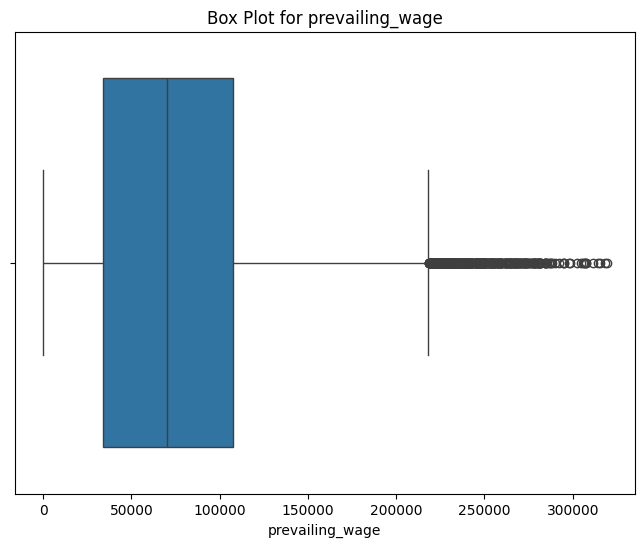

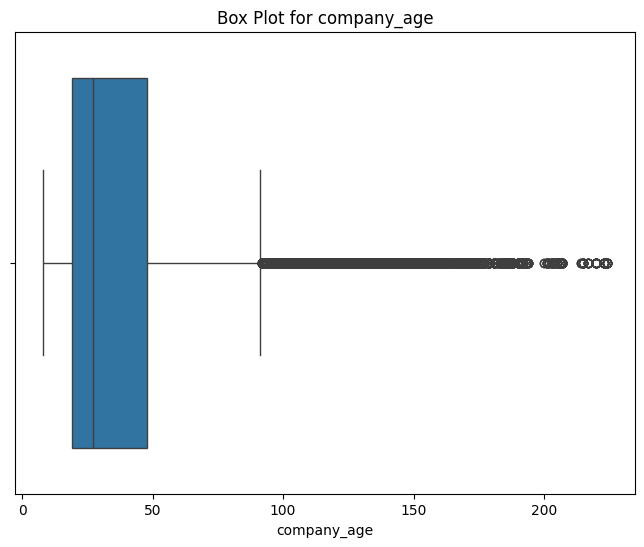

In [53]:

# List of numerical columns to check for outliers
Num1_column = ['no_of_employees', 'prevailing_wage', 'company_age']

# Loop through each column and create a box plot individually
for column in Num1_column:
    plt.figure(figsize=(8, 6))  # Set the figure size for each plot
    sns.boxplot(x=da[column])  # Create a box plot for the current column

    # Set the title and labels
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

    # Show the plot
    plt.show()

Original dataset size for no_of_employees: 25480
Dataset size after removing outliers for no_of_employees: 23924


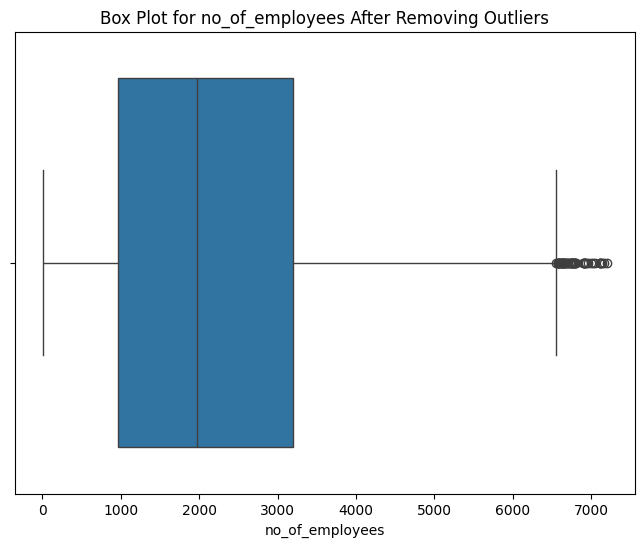

Original dataset size for prevailing_wage: 25480
Dataset size after removing outliers for prevailing_wage: 23519


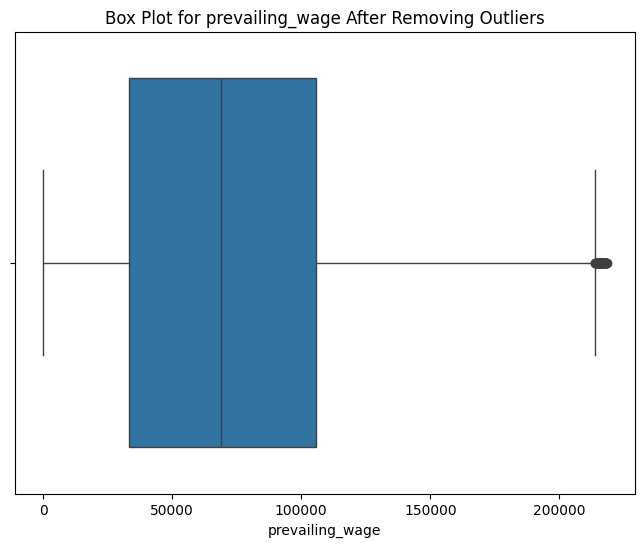

Original dataset size for company_age: 25480
Dataset size after removing outliers for company_age: 20531


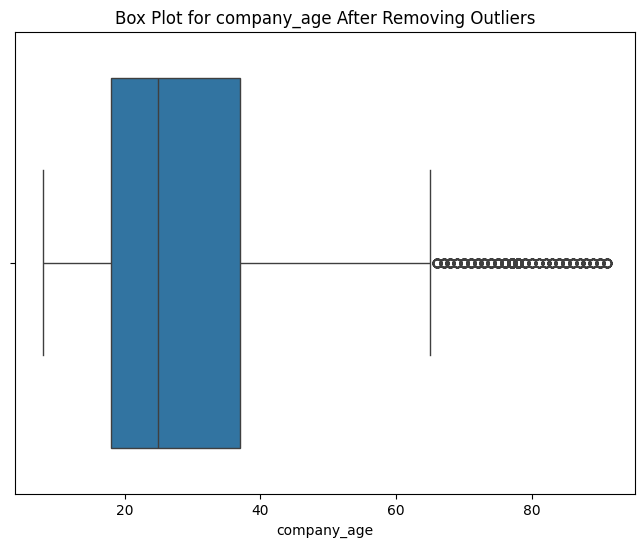

In [54]:
num_columns = ['no_of_employees', 'prevailing_wage', 'company_age']

# Start with the original dataset
da_no_outliers = da.copy()  # Make a copy of the original dataframe to work on

# Loop through each column to remove outliers using the IQR method
for column in num_columns:
    # Calculate the first (25%) and third (75%) quartiles for the column
    Q1 = da_no_outliers[column].quantile(0.25)
    Q3 = da_no_outliers[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for valid values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the rows that fall within the bounds (remove outliers)
    da_no_outliers = da_no_outliers[(da_no_outliers[column] >= lower_bound) & (da_no_outliers[column] <= upper_bound)]

    # Display the result
    print(f"Original dataset size for {column}: {da.shape[0]}")
    print(f"Dataset size after removing outliers for {column}: {da_no_outliers.shape[0]}")

    # Plot the box plot after removing outliers for the column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=da_no_outliers[column])
    plt.title(f'Box Plot for {column} After Removing Outliers')
    plt.xlabel(column)
    plt.show()

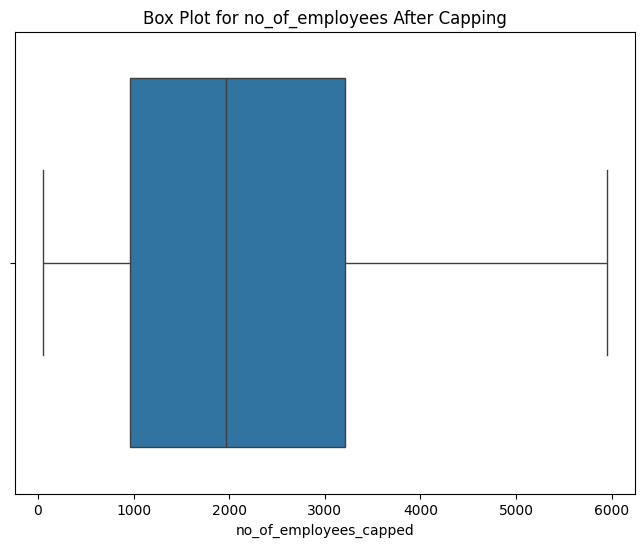

Capping thresholds for no_of_employees: Lower = 54.0, Upper = 5947.900000000005


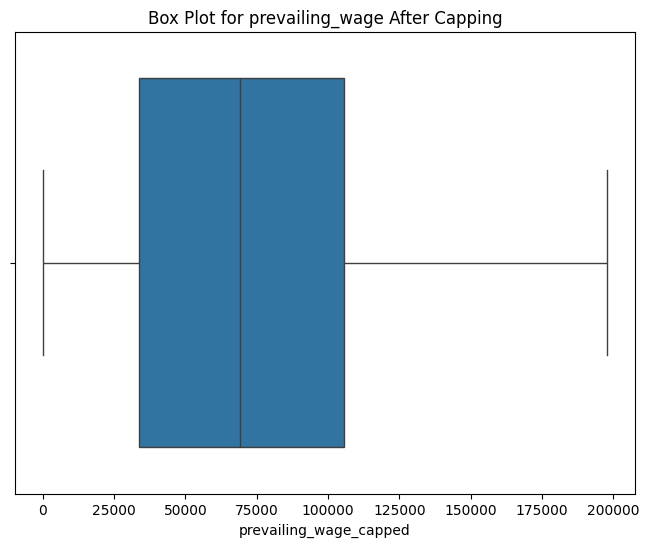

Capping thresholds for prevailing_wage: Lower = 105.35663, Upper = 197696.52000000002


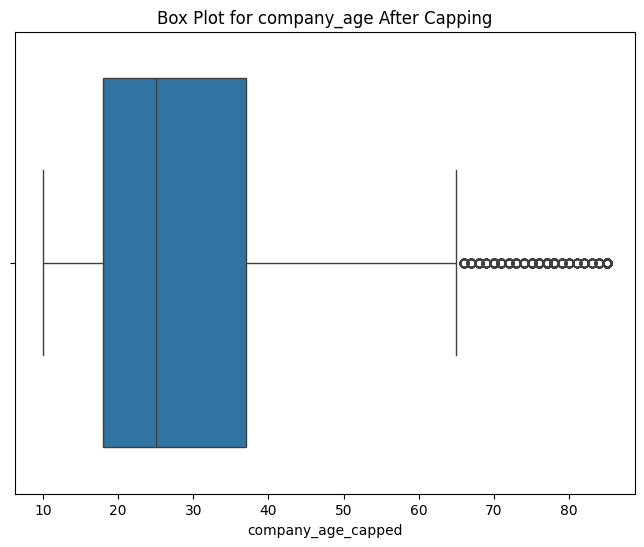

Capping thresholds for company_age: Lower = 10.0, Upper = 85.0


In [55]:
# Code 2: Apply Capping to Remaining Data
# Percentile limits for capping
lower_percentile = 0.01  # 1st percentile
upper_percentile = 0.99  # 99th percentile

# Loop through each column and apply capping
for column in num_columns:
    # Calculate capping thresholds
    lower_cap = da_no_outliers[column].quantile(lower_percentile)
    upper_cap = da_no_outliers[column].quantile(upper_percentile)

    # Apply capping to bring extreme values within the specified range
    da_no_outliers[f'{column}_capped'] = da_no_outliers[column].clip(lower=lower_cap, upper=upper_cap)

    # Plot the box plot before and after capping
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=da_no_outliers[f'{column}_capped'])
    plt.title(f'Box Plot for {column} After Capping')
    plt.xlabel(f'{column}_capped')
    plt.show()

    # Print capping thresholds
    print(f"Capping thresholds for {column}: Lower = {lower_cap}, Upper = {upper_cap}")

In [56]:
da.shape

(25480, 18)

In [57]:
# after treating outliers there is a huge drop in the dataset(i.e from 25480 rows to just 20531 rows)
da_no_outliers.shape

(20531, 21)

In [58]:
# hence treating outliers result in huge dataloss, we are going to proceed without treating the outliers. by choosing models that are less sensitive to outliers we can get better models even with the outliers presence.

In [59]:
# hence outliers still present and we can do 2 things
# 1st removing the outliers hence their correlation with the target variable is less as we saw in correlation plot.
# 2nd we can just choose and proceed with the models that are less important to outliers (Yes, if you choose models that are less sensitive to outliers (like tree-based models), you can proceed without removing the remaining outliers.)

In [60]:
#Perform EDA: Explore categorical and numerical variables in their original form.(univariate - numerical and categorical) and (Bivariate - numerical and categorical)
#Document Insights: Note patterns, relationships, and key takeaways from EDA.
#Preprocess Data:
#Handle missing values, outliers, etc.
#Perform encoding (like one-hot encoding) and other transformations.

In [61]:
case_status_mapping = {
    'Certified': 1,
    'Denied': 0
}
da['case_status'] = da['case_status'].map(case_status_mapping)

# Verify the mapping
print(da['case_status'].value_counts())

case_status
1    17018
0     8462
Name: count, dtype: int64


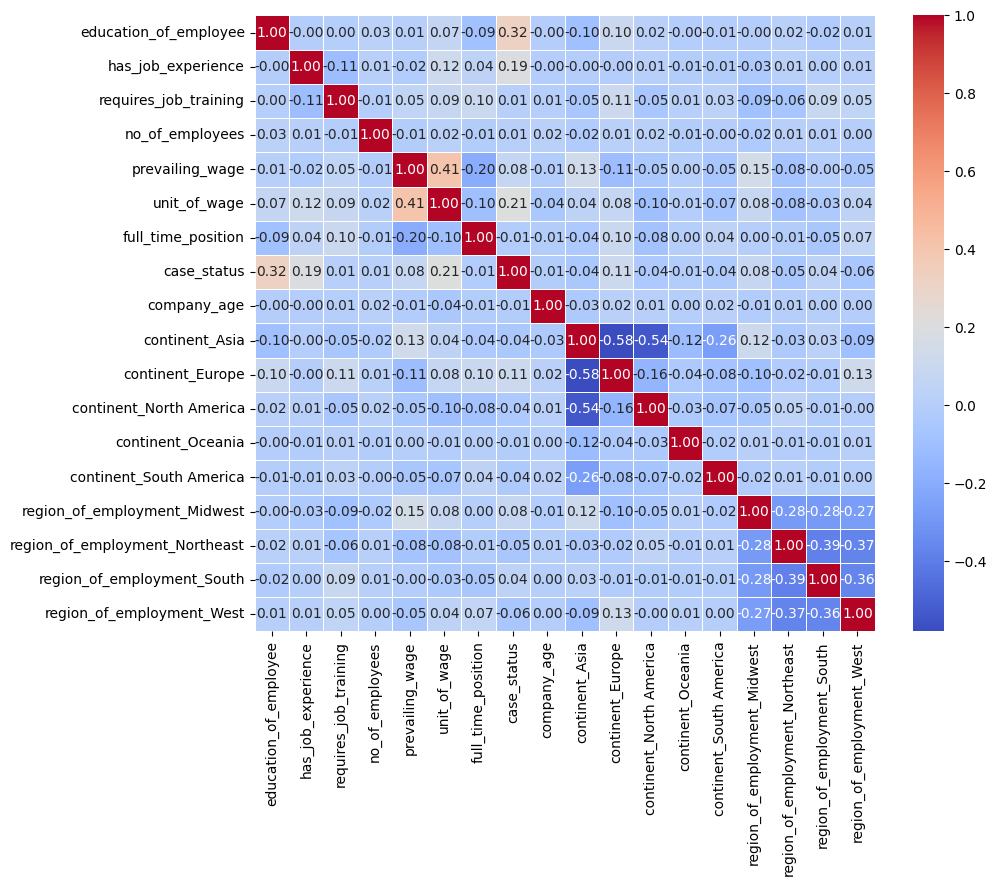

In [62]:
corr_matrix = da.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [63]:
X = da.drop(columns=['case_status'])
y = da['case_status']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify shapes
print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (20384, 17)
Validation Set Shape: (2548, 17)
Test Set Shape: (2548, 17)


In [64]:
print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
case_status
1    0.667896
0    0.332104
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
case_status
1    0.667877
0    0.332123
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64
********************************************************************************


In [65]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   education_of_employee           25480 non-null  category
 1   has_job_experience              25480 non-null  category
 2   requires_job_training           25480 non-null  category
 3   no_of_employees                 25480 non-null  float64 
 4   prevailing_wage                 25480 non-null  float64 
 5   unit_of_wage                    25480 non-null  category
 6   full_time_position              25480 non-null  category
 7   case_status                     25480 non-null  category
 8   company_age                     25480 non-null  int64   
 9   continent_Asia                  25480 non-null  float64 
 10  continent_Europe                25480 non-null  float64 
 11  continent_North America         25480 non-null  float64 
 12  continent_Oceania 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import recall_score
from xgboost import XGBClassifier

categorical_columns = ['education_of_employee', 'has_job_experience', 'requires_job_training', 'unit_of_wage', 'full_time_position']

# Apply LabelEncoder or map manually to convert categorical columns to numerical values if not done already
for col in categorical_columns:
    # If they are already mapped, just ensure the type is numeric
    if da[col].dtype == 'category':
        da[col] = da[col].cat.codes

# Now proceed with train-test split as before
X = da.drop(columns=['case_status'])  # Features
y = da['case_status']  # Target variable

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_recall = recall_score(y_train, y_train_pred)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred)

    # Store the results
    results[model_name] = {
        "Training Recall": train_recall,
        "Validation Recall": val_recall
    }

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Training Recall: {metrics['Training Recall']:.4f}")
    print(f"Validation Recall: {metrics['Validation Recall']:.4f}")
    print("\n")


Model: Decision Tree
Training Recall: 1.0000
Validation Recall: 0.7368


Model: Random Forest
Training Recall: 1.0000
Validation Recall: 0.8331


Model: Gradient Boosting
Training Recall: 0.8717
Validation Recall: 0.8660


Model: AdaBoost
Training Recall: 0.8873
Validation Recall: 0.8749


Model: XGBoost
Training Recall: 0.9274
Validation Recall: 0.8613




In [67]:
print("\nDifference Between Training Recall and Validation Recall:\n")

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_recall = recall_score(y_train, y_train_pred)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred)

    # Calculate the difference
    difference = train_recall - val_recall

    # Print the results
    print(f"Model: {model_name}")
    print(f"Training Recall: {train_recall:.4f}")
    print(f"Validation Recall: {val_recall:.4f}")
    print(f"Difference: {difference:.4f}")
    print("\n")


Difference Between Training Recall and Validation Recall:

Model: Decision Tree
Training Recall: 1.0000
Validation Recall: 0.7368
Difference: 0.2632


Model: Random Forest
Training Recall: 1.0000
Validation Recall: 0.8331
Difference: 0.1669


Model: Gradient Boosting
Training Recall: 0.8717
Validation Recall: 0.8660
Difference: 0.0056


Model: AdaBoost
Training Recall: 0.8873
Validation Recall: 0.8749
Difference: 0.0125


Model: XGBoost
Training Recall: 0.9274
Validation Recall: 0.8613
Difference: 0.0660




In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Oversample the training data
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Verify the balance in the oversampled data
print("Class distribution before oversampling:", y_train.value_counts())
print("Class distribution after oversampling:", y_train_oversampled.value_counts())

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model on oversampled data
    model.fit(X_train_oversampled, y_train_oversampled)

    # Predict on the training set
    y_train_pred = model.predict(X_train_oversampled)
    train_recall = recall_score(y_train_oversampled, y_train_pred)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred)

    # Calculate the difference
    recall_difference = abs(train_recall - val_recall)

    # Store the results
    results[model_name] = {
        "Training Recall": train_recall,
        "Validation Recall": val_recall,
        "Recall Difference": recall_difference
    }

# Display results
print("\nResults After Oversampling:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Training Recall: {metrics['Training Recall']:.4f}")
    print(f"Validation Recall: {metrics['Validation Recall']:.4f}")
    print(f"Recall Difference: {metrics['Recall Difference']:.4f}")
    print("\n")


Class distribution before oversampling: case_status
1    13614
0     6770
Name: count, dtype: int64
Class distribution after oversampling: case_status
1    13614
0    13614
Name: count, dtype: int64

Results After Oversampling:

Model: Decision Tree
Training Recall: 1.0000
Validation Recall: 0.7309
Recall Difference: 0.2691


Model: Random Forest
Training Recall: 1.0000
Validation Recall: 0.8161
Recall Difference: 0.1839


Model: Gradient Boosting
Training Recall: 0.8371
Validation Recall: 0.8308
Recall Difference: 0.0063


Model: AdaBoost
Training Recall: 0.8352
Validation Recall: 0.8237
Recall Difference: 0.0115


Model: XGBoost
Training Recall: 0.9052
Validation Recall: 0.8349
Recall Difference: 0.0703




In [69]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Undersample the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Verify the balance in the undersampled data
print("Class distribution before undersampling:", y_train.value_counts())
print("Class distribution after undersampling:", y_train_undersampled.value_counts())

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)  # Added XGBoost
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model on undersampled data
    model.fit(X_train_undersampled, y_train_undersampled)

    # Predict on the training set
    y_train_pred = model.predict(X_train_undersampled)
    train_recall = recall_score(y_train_undersampled, y_train_pred)

    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred)

    # Calculate the difference
    recall_difference = abs(train_recall - val_recall)

    # Store the results
    results[model_name] = {
        "Training Recall": train_recall,
        "Validation Recall": val_recall,
        "Recall Difference": recall_difference
    }

# Display results
print("\nResults After Undersampling:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Training Recall: {metrics['Training Recall']:.4f}")
    print(f"Validation Recall: {metrics['Validation Recall']:.4f}")
    print(f"Recall Difference: {metrics['Recall Difference']:.4f}")
    print("\n")


Class distribution before undersampling: case_status
1    13614
0     6770
Name: count, dtype: int64
Class distribution after undersampling: case_status
1    6770
0    6770
Name: count, dtype: int64

Results After Undersampling:

Model: Decision Tree
Training Recall: 1.0000
Validation Recall: 0.6093
Recall Difference: 0.3907


Model: Random Forest
Training Recall: 1.0000
Validation Recall: 0.6563
Recall Difference: 0.3437


Model: Gradient Boosting
Training Recall: 0.7409
Validation Recall: 0.7180
Recall Difference: 0.0229


Model: AdaBoost
Training Recall: 0.7180
Validation Recall: 0.7051
Recall Difference: 0.0130


Model: XGBoost
Training Recall: 0.8412
Validation Recall: 0.6692
Recall Difference: 0.1720




In [70]:
#Hypertuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
import numpy as np

# Define parameter grids for each model
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Perform RandomizedSearchCV for each model
rf_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=3, scoring='recall', random_state=42, n_jobs=-1)
gb_search = RandomizedSearchCV(gb, gb_param_grid, n_iter=10, cv=3, scoring='recall', random_state=42, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, xgb_param_grid, n_iter=10, cv=3, scoring='recall', random_state=42, n_jobs=-1)

# Fit the models
rf_search.fit(X_train_oversampled, y_train_oversampled)
gb_search.fit(X_train_oversampled, y_train_oversampled)
xgb_search.fit(X_train_oversampled, y_train_oversampled)

# Get best results from tuning
print(f"Best Random Forest Parameters: {rf_search.best_params_}")
print(f"Best Gradient Boosting Parameters: {gb_search.best_params_}")
print(f"Best XGBoost Parameters: {xgb_search.best_params_}")


Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Best Gradient Boosting Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.001, 'colsample_bytree': 0.7}


In [72]:
from sklearn.metrics import recall_score

# Initialize models with the best parameters
rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

gb_tuned = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

xgb_tuned = XGBClassifier(
    subsample=0.7,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.001,
    colsample_bytree=0.7,
    random_state=42
)

# Train the models on the oversampled training data
rf_tuned.fit(X_train_oversampled, y_train_oversampled)
gb_tuned.fit(X_train_oversampled, y_train_oversampled)
xgb_tuned.fit(X_train_oversampled, y_train_oversampled)

# Predict on the validation set
rf_val_pred = rf_tuned.predict(X_val)
gb_val_pred = gb_tuned.predict(X_val)
xgb_val_pred = xgb_tuned.predict(X_val)

# Calculate recall scores on the validation set
rf_recall = recall_score(y_val, rf_val_pred)
gb_recall = recall_score(y_val, gb_val_pred)
xgb_recall = recall_score(y_val, xgb_val_pred)

# Display results
print("Validation Recall Scores:")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Gradient Boosting Recall: {gb_recall:.4f}")
print(f"XGBoost Recall: {xgb_recall:.4f}")


Validation Recall Scores:
Random Forest Recall: 0.8278
Gradient Boosting Recall: 0.8361
XGBoost Recall: 0.8625


In [73]:
# Predict on the test set using the tuned models
rf_test_pred = rf_tuned.predict(X_test)
gb_test_pred = gb_tuned.predict(X_test)
xgb_test_pred = xgb_tuned.predict(X_test)

# Calculate recall scores on the test set
rf_test_recall = recall_score(y_test, rf_test_pred)
gb_test_recall = recall_score(y_test, gb_test_pred)
xgb_test_recall = recall_score(y_test, xgb_test_pred)

# Display test recall scores
print("Test Recall Scores:")
print(f"Random Forest Recall: {rf_test_recall:.4f}")
print(f"Gradient Boosting Recall: {gb_test_recall:.4f}")
print(f"XGBoost Recall: {xgb_test_recall:.4f}")


Test Recall Scores:
Random Forest Recall: 0.8425
Gradient Boosting Recall: 0.8420
XGBoost Recall: 0.8696


In [74]:
uytfyufjh

NameError: name 'uytfyufjh' is not defined

In [ ]:
#Model Building